In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from old_helper import OldHelper

In [2]:
xwd = 0.
ywd = 0.
zwd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":10}
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

In [3]:
old_helper = OldHelper()
helper = Helper()

In [4]:
s = 7
old_green = old_helper.get_green_matrix(well, s)
new_green = helper.get_green_matrix(well, s)

In [5]:
i_old = range(10, 20)
i_new = range(20)
v_old = old_green[0,1:]
v_new = new_green[10, 1:]

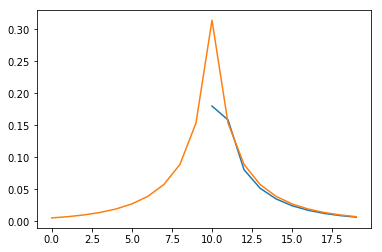

In [6]:
plt.plot(i_old, v_old)
plt.plot(i_new, v_new)

### Here I found that I can't align old and new Green matrices, but decide to proceed

In [7]:
old_source = old_helper.get_source_matrix(well, s)
new_source = helper.get_source_matrix(well, s)

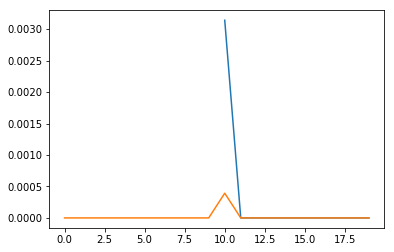

In [8]:
s_old = old_source[0, 1:]
s_new = new_source[10, 1:]
plt.plot(i_old, s_old)
plt.plot(i_new, s_new)

In [9]:
old_right = old_helper.get_right_part(well, s)
new_right = helper.get_right_part(well, s)

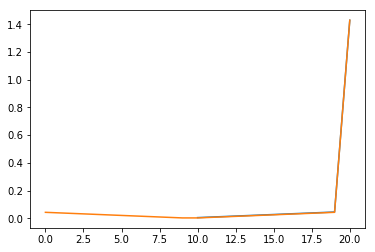

In [10]:
i_r_old = range(10,21)
i_r_new = range(21)
plt.plot(i_r_old, old_right)
plt.plot(i_r_new, new_right)

In [11]:
sub_r_new = new_right[10:]

In [12]:
sub_r_new/old_right

array([ 0.5       ,  0.75      ,  0.83333333,  0.875     ,  0.9       ,
        0.91666667,  0.92857143,  0.9375    ,  0.94444444,  0.95      ,  1.        ])

### Here I cheked right parts

In [13]:
from well import Well
import pandas as pd

In [14]:
ref_df = pd.read_csv('./calibration_points.csv', sep=";", decimal=',')
y_true = ref_df.iloc[:,[3]]
Fcd = float(y_true.columns[0].replace(',', '.'))
ts = np.array(ref_df["Td_xf"])
print("Fcd = {}".format(Fcd))

Fcd = 6.283185307


In [15]:
xw = 0
yw = 0
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 12
params = {"nseg": 40, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":Fcd, "ref_length":1.,
         "z_ref_length": 1}
real_well = Well(xw, yw, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)

In [16]:
y_pred_old = []
y_pred_new = []
for t in ts:
    y_pred_old.append(real_well.get_pw(t, mode="old"))
    y_pred_new.append(real_well.get_pw(t, mode = "new"))

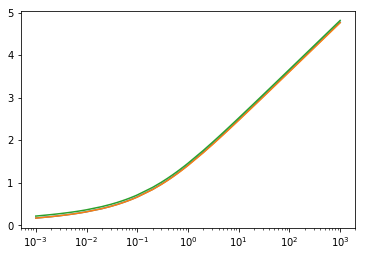

In [17]:
plt.xscale("log")
plt.plot(ts,y_true)
plt.plot(ts, y_pred_old)
plt.plot(ts, y_pred_new)

### Here I checked that new function is OK overall

In [18]:
ss = np.log(2.)/np.logspace(-3,1,5)

In [30]:
s = ss[-2]
real_well.lapl_well.recalc(s, mode = "old")
old_src = real_well.lapl_well.source_distrib
real_well.lapl_well.recalc(s, mode = "new")
new_src = real_well.lapl_well.source_distrib

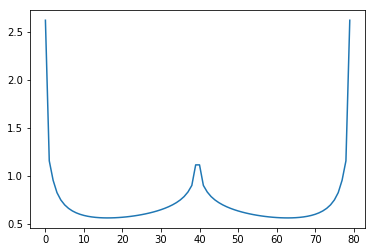

In [31]:
#plt.plot(old_src)
plt.plot(new_src)